In [1]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=1, threads_per_worker=16)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:38069 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 16 Memory: 181.25 GiB


In [2]:
indir='/burg/abernathey/users/csj2114/agulhas-offline/time_1/'
import xarray as xr
from glob import glob
import numpy as np

In [3]:
fnames = sorted(glob(f'{indir}/process_*/rechunked_*.zarr'))

In [4]:
def lanczos(x, a):
    return np.sinc(x/a)
window_width=20
weight = xr.DataArray(lanczos(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])

In [5]:
target_unf = '/burg/abernathey/users/csj2114/agulhas-offline/time_1/unfiltered_vels.zarr'
target_filt = '/burg/abernathey/users/csj2114/agulhas-offline/time_1/filtered_vels.zarr'

nofiles = len(fnames)
for fileno in range(0,nofiles):#
        iterno = 6048+144*fileno
        print('/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_'+ str(iterno) + '/rechunked_' 
              + str(iterno) + '.zarr')
        ds = xr.open_zarr('/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_'+ str(iterno) + '/rechunked_' 
              + str(iterno) + '.zarr')
        ds = ds.isel(niter=slice(1,74))
        ds['time'] = ds['niter']*3600/144
        ds = ds.assign_coords({"time": ds.time})
        ds = ds.swap_dims({"niter": "time"})
        ds = ds.where((ds.u!=-999).all(dim='time'))
        window_width=20
        weight = xr.DataArray(lanczos(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])
        windowed_u = ds.u.rolling(time=window_width, center=True).construct('window').dot(weight)/np.sum(weight)
        windowed_v = ds.v.rolling(time=window_width, center=True).construct('window').dot(weight)/np.sum(weight)
        u_piece = windowed_u.sel(time=0).isel(z0=3)
        v_piece = windowed_v.sel(time=0).isel(z0=3)
        u_piece2 = ds.u.sel(time=0).isel(z0=3)
        v_piece2 = ds.v.sel(time=0).isel(z0=3)
        u_piece["time"] = fileno*3600
        v_piece["time"] = fileno*3600
        u_piece2["time"] = fileno*3600
        v_piece2["time"] = fileno*3600
        unfiltered_vels = u_piece2.to_dataset(name='u')
        unfiltered_vels['v'] = v_piece2
        unfiltered_vels.time.attrs['units']='time in seconds'
        unfiltered_vels.u.attrs['units']='m/s'
        unfiltered_vels.v.attrs['units']='m/s'
        unfiltered_vels.y0.attrs['long_name']='latitude'
        unfiltered_vels.x0.attrs['units']='longitude'
        unfiltered_vels = unfiltered_vels.rename_dims({"x0":"i"})
        unfiltered_vels = unfiltered_vels.rename_dims({"y0":"j"})
        unfiltered_vels.expand_dims('time').chunk().to_zarr(target_unf, append_dim='time')
        filtered_vels = u_piece.to_dataset(name='u')
        filtered_vels['v'] = v_piece
        filtered_vels.time.attrs['units']='time in seconds'
        filtered_vels.u.attrs['units']='m/s'
        filtered_vels.v.attrs['units']='m/s'
        filtered_vels.y0.attrs['long_name']='latitude'
        filtered_vels.x0.attrs['units']='longitude'
        filtered_vels = filtered_vels.rename_dims({"x0":"i"})
        filtered_vels = filtered_vels.rename_dims({"y0":"j"})
        filtered_vels.expand_dims('time').chunk().to_zarr(target_filt, append_dim='time')
        #if fileno==0:
        #    u_filtered = u_piece
        #    v_filtered = v_piece
        #    u_unfiltered = u_piece2
        #    v_unfiltered = v_piece2
        #else:
        #    u_filtered = xr.concat([u_filtered,u_piece],dim='time')
        #    v_filtered = xr.concat([v_filtered,v_piece],dim='time')
        #    u_unfiltered = xr.concat([u_unfiltered,u_piece2],dim='time')
        #    v_unfiltered = xr.concat([v_unfiltered,v_piece2],dim='time')

/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6048/rechunked_6048.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6192/rechunked_6192.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6336/rechunked_6336.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6480/rechunked_6480.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6624/rechunked_6624.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6768/rechunked_6768.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6912/rechunked_6912.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7056/rechunked_7056.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7200/rechunked_7200.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7344/rechunked_7344.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7488/rechunked_7488.zarr
/burg/abernathey/users/csj2114/agulhas-offl

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8064/rechunked_8064.zarr


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8208/rechunked_8208.zarr


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8352/rechunked_8352.zarr


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8496/rechunked_8496.zarr


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8640/rechunked_8640.zarr


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8784/rechunked_8784.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8928/rechunked_8928.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9072/rechunked_9072.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9216/rechunked_9216.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9360/rechunked_9360.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9504/rechunked_9504.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9648/rechunked_9648.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9792/rechunked_9792.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9936/rechunked_9936.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_10080/rechunked_10080.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_10224/rechunked_10224.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_10368/rechunked_10368.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_10512/rechunked_10512.zarr
/burg/abernathey/users/csj2114/agul

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14256/rechunked_14256.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14400/rechunked_14400.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14544/rechunked_14544.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14688/rechunked_14688.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14832/rechunked_14832.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_14976/rechunked_14976.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15120/rechunked_15120.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15264/rechunked_15264.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15408/rechunked_15408.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15552/rechunked_15552.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15696/rechunked_15696.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15840/rechunked_15840.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_15984/rechunked_15984.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_16128/rechunked_16128.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_16272/rechunked_16272.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_16416/rechunked_16416.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_16560/rechunked_16560.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_16704/rechunked_16704.zarr
/burg/abernathey/user

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_17136/rechunked_17136.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_17280/rechunked_17280.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_17424/rechunked_17424.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_17568/rechunked_17568.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [6]:
nofiles = len(fnames)
nofiles

81

In [7]:
target_unf = '/burg/abernathey/users/csj2114/agulhas-offline/time_1/unfiltered_eta_nom.zarr'
target_filt = '/burg/abernathey/users/csj2114/agulhas-offline/time_1/filtered_eta_nom.zarr'
nofiles = len(fnames)
for fileno in range(0,nofiles):#nofiles
        iterno = 6048+144*fileno
        print('/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_'+ str(iterno) + '/rechunked_' 
              + str(iterno) + '.zarr')
        ds = xr.open_zarr('/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_'+ str(iterno) + '/rechunked_' 
              + str(iterno) + '.zarr')
        ds = ds.isel(niter=slice(1,74))
        ds['time'] = ds['niter']*3600/144
        ds = ds.assign_coords({"time": ds.time})
        ds = ds.swap_dims({"niter": "time"})
        ds = ds.where((ds.u!=-999).all(dim='time'))
        mask_roundx = abs(ds.x.diff('time')).max('time')
        mask_roundy = abs(ds.y.diff('time')).max('time')
        ds = ds.where(mask_roundx<30)
        ds = ds.where(mask_roundy<30)
        window_width=20
        weight = xr.DataArray(lanczos(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])
        windowed_eta = ds.eta.rolling(time=window_width, center=True).construct('window').dot(weight)/np.sum(weight)
        eta_piece = windowed_eta.sel(time=0).isel(z0=3)
        eta_piece2 = ds.eta.sel(time=0).isel(z0=3)
        eta_piece["time"] = fileno*3600
        eta_piece2["time"] = fileno*3600
        unfiltered_eta = eta_piece2.to_dataset(name='eta')
        unfiltered_eta.time.attrs['units']='time in seconds'
        unfiltered_eta.y0.attrs['long_name']='latitude'
        unfiltered_eta.x0.attrs['units']='longitude'
        unfiltered_eta = unfiltered_eta.rename_dims({"x0":"i"})
        unfiltered_eta = unfiltered_eta.rename_dims({"y0":"j"})
        unfiltered_eta.expand_dims('time').chunk().to_zarr(target_unf, append_dim='time')
        filtered_eta = eta_piece.to_dataset(name='eta')
        filtered_eta.time.attrs['units']='time in seconds'
        filtered_eta.y0.attrs['long_name']='latitude'
        filtered_eta.x0.attrs['units']='longitude'
        filtered_eta = filtered_eta.rename_dims({"x0":"i"})
        filtered_eta = filtered_eta.rename_dims({"y0":"j"})
        filtered_eta.expand_dims('time').chunk().to_zarr(target_filt, append_dim='time')

/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6048/rechunked_6048.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6192/rechunked_6192.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6336/rechunked_6336.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6480/rechunked_6480.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6624/rechunked_6624.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6768/rechunked_6768.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_6912/rechunked_6912.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7056/rechunked_7056.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7200/rechunked_7200.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7344/rechunked_7344.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7488/rechunked_7488.zarr
/burg/abernathey/users/csj2114/agulhas-offl

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7776/rechunked_7776.zarr


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_7920/rechunked_7920.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8064/rechunked_8064.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8208/rechunked_8208.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8352/rechunked_8352.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8496/rechunked_8496.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8640/rechunked_8640.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8784/rechunked_8784.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_8928/rechunked_8928.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9072/rechunked_9072.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9216/rechunked_9216.zarr
/burg/abernathey/users/csj2114/agulhas-offline/time_1/process_9360/rechunked_9360.zarr
/burg/abernathey/users/csj2114/agulhas-offl

In [11]:
filtered_vels = u_filtered.to_dataset(name='u')
filtered_vels['v'] = v_filtered
filtered_vels.time.attrs['units']='time in seconds'
filtered_vels.u.attrs['units']='m/s'
filtered_vels.v.attrs['units']='m/s'
filtered_vels.y0.attrs['long_name']='latitude'
filtered_vels.x0.attrs['units']='longitude'
filtered_vels = filtered_vels.rename_dims({"x0":"i"})
filtered_vels = filtered_vels.rename_dims({"y0":"j"})
filtered_vels.chunk().to_zarr('/burg/abernathey/users/csj2114/agulhas-offline/time_1/filtered_vels.zarr')

In [8]:
filtered_vels

,Array,Chunk
Bytes,355.96 MiB,253.12 kiB
Shape,"(10, 2160, 2160)","(1, 180, 180)"
Count,623981 Tasks,1440 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,355.96 MiB,253.12 kiB
Shape,"(10, 2160, 2160)","(1, 180, 180)"
Count,635511 Tasks,1440 Chunks
Type,float64,numpy.ndarray


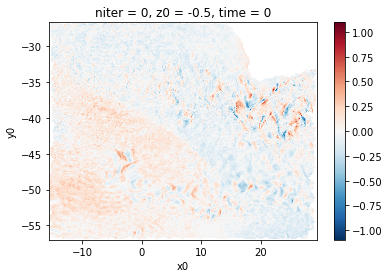

In [13]:
(v_unfiltered-v_filtered).plot(x='x0')